In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from scipy.special import inv_boxcox
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score,median_absolute_error,mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import median_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

Importing data

In [2]:
final_data = pd.read_csv(r"C:\Users\sneha.priya\OneDrive - WiseTech Global Pty Ltd\Desktop\DS\VDT model\DS Interview Assignment\DS Interview Assignment\Data for Assignment 1\csv_files\model_data.csv")

In [3]:
final_data.columns

Index(['Unnamed: 0', 'HAZMAT', 'IMPORT_DWELL', 'IMPORT_DWELL_SCALED',
       'IS_WEEKEND', 'Vessel_size_category', 'VTT', 'AVERAGE_BERTH_TIME',
       'Total_Arrival_in_Window', 'Terminals_in_Port', 'UNIQUE_VESSELS_RATIO',
       'ARRIVALS_RATIO'],
      dtype='object')

In [4]:
final_data = final_data.rename(columns={"CLUSTER": "Vessel_size_category"})

Columns required

In [5]:
encoded_data = final_data[['HAZMAT','IMPORT_DWELL','IMPORT_DWELL_SCALED', 'IS_WEEKEND','Vessel_size_category', 'VTT',
       'AVERAGE_BERTH_TIME', 'Total_Arrival_in_Window', 'Terminals_in_Port',
       'UNIQUE_VESSELS_RATIO', 'ARRIVALS_RATIO']]

In [6]:
encoded_data

,HAZMAT,IMPORT_DWELL,IMPORT_DWELL_SCALED,IS_WEEKEND,Vessel_size_category,VTT,AVERAGE_BERTH_TIME,Total_Arrival_in_Window,Terminals_in_Port,UNIQUE_VESSELS_RATIO,ARRIVALS_RATIO
0,0,30.683333,5.581219,0,0,45.800000,60.251366,640,2,0.619048,0.803279
1,0,56.000000,7.200192,0,0,45.800000,60.251366,640,2,0.619048,0.803279
2,0,147.266667,10.409747,0,0,45.800000,60.251366,640,2,0.619048,0.803279
3,0,27.550000,5.317675,0,0,45.800000,60.251366,640,2,0.619048,0.803279
4,0,28.133333,5.368350,0,0,45.800000,60.251366,640,2,0.619048,0.803279
...,...,...,...,...,...,...,...,...,...,...,...
965,0,250.966667,12.565010,0,2,291.000000,123.327140,2937,4,0.096774,0.047297
966,0,156.716667,10.645773,0,0,205.233333,123.327140,2937,4,0.387097,0.236486
967,0,237.216667,12.322515,0,0,24.500000,24.482583,4850,3,0.833333,0.734234
968,0,237.483333,12.327315,0,0,24.500000,24.482583,4850,3,0.833333,0.734234


Splitting Non scaled Import dwell into 80-20 train and test for later actual data usage while doing inverse transformation

In [7]:
X_data = encoded_data.drop('IMPORT_DWELL_SCALED', axis=1)
y_data = encoded_data['IMPORT_DWELL']

In [8]:
# Split the data into training and testing sets for the encoded data
X_train_encoded, X_test_encoded, y_train_actual, y_test_actual = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42
)

In [9]:
y_test_actual

575    147.000000
259      6.800000
388    143.883333
495    106.083333
70     153.266667
          ...    
964     88.483333
745     66.533333
893    131.300000
33     165.083333
31     149.350000
Name: IMPORT_DWELL, Length: 194, dtype: float64

Splitting scaled Import dwell for modelling

In [10]:
X_encoded = X_data.drop('IMPORT_DWELL', axis=1)
y_encoded = encoded_data['IMPORT_DWELL_SCALED']

In [11]:
X_encoded

,HAZMAT,IS_WEEKEND,Vessel_size_category,VTT,AVERAGE_BERTH_TIME,Total_Arrival_in_Window,Terminals_in_Port,UNIQUE_VESSELS_RATIO,ARRIVALS_RATIO
0,0,0,0,45.800000,60.251366,640,2,0.619048,0.803279
1,0,0,0,45.800000,60.251366,640,2,0.619048,0.803279
2,0,0,0,45.800000,60.251366,640,2,0.619048,0.803279
3,0,0,0,45.800000,60.251366,640,2,0.619048,0.803279
4,0,0,0,45.800000,60.251366,640,2,0.619048,0.803279
...,...,...,...,...,...,...,...,...,...
965,0,0,2,291.000000,123.327140,2937,4,0.096774,0.047297
966,0,0,0,205.233333,123.327140,2937,4,0.387097,0.236486
967,0,0,0,24.500000,24.482583,4850,3,0.833333,0.734234
968,0,0,0,24.500000,24.482583,4850,3,0.833333,0.734234


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y_encoded,test_size=0.2,random_state=42)

In [13]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

In [14]:
# Fittong the model on the training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Use the model to make predictions on the test set
y_test_pred_scaled = rf_regressor.predict(X_test)
y_test_pred_scaled

array([ 9.84457425,  5.16488724, 10.33545622,  9.12862286,  8.56705941,
        6.2044366 ,  6.79083464, 10.6252015 ,  7.95750052, 11.19981547,
        7.27345411, 11.62232617, 11.66959981,  7.69718446,  8.69454986,
        8.68199756, 10.02275587,  8.56705941, 10.13425298, 11.23309852,
        6.2044366 ,  7.7396055 ,  9.81140189,  6.79083464,  9.3131498 ,
        6.50832792,  9.81605689,  9.12862286,  5.54390476,  7.12130973,
        8.46788236,  9.66257745,  8.61594857,  8.82764517,  6.2328832 ,
       16.32655709, 10.61607302,  8.69454986,  9.8766172 , 10.33545622,
        4.00287802,  7.75497684,  9.02952608, 11.62232617, 11.64926224,
        9.7367948 ,  7.70103146, 10.05892195,  7.37683747, 11.23309852,
        7.47312102, 12.59060746,  8.3227013 ,  8.82337149,  5.54390476,
        9.43257862,  7.7396055 , 10.76766353,  6.97403425,  9.75525557,
        9.36165379,  7.37683747,  9.3131498 ,  8.56705941, 12.80651125,
        6.75464255,  6.16216209,  7.95502591,  8.56705941, 10.05

In [16]:
# Predict on the training data
y_train_pred_scaled = rf_regressor.predict(X_train)
y_train_pred_scaled

array([ 6.56729688,  8.45372177,  8.23575365, 10.13425298,  7.12040306,
        9.28746667, 10.69525652,  5.46206232, 10.56124185,  4.70439399,
        6.16216209,  5.70741312,  6.40529209, 10.03836566,  6.01545942,
        9.8766172 , 10.13425298, 10.05892195, 10.1007926 ,  7.58441361,
        9.95539348,  9.54323474,  9.8766172 , 10.30431293,  7.37683747,
        9.19040582,  7.58441361,  8.98454847,  6.04812252,  7.70103146,
        8.21005356,  8.77700129,  7.92485093,  9.94281809,  7.37683747,
        6.75230015,  9.09581299,  6.75464255,  4.56669012,  9.78392315,
        9.69823279, 10.02275587,  4.00287802,  6.35324438,  9.27221602,
        9.81140189,  9.81416226,  9.81140189, 10.89787338,  6.16216209,
        4.75009065,  6.25241483, 12.74343879,  8.67681999, 12.80651125,
       10.02275587,  8.98454847,  9.12862286,  8.29113462,  9.30408697,
        4.79770343,  7.37683747,  9.49238765,  6.40529209,  7.702524  ,
       10.14000054,  9.3131498 ,  8.71264908, 12.61734355,  6.25

Inverse transformation

In [17]:
y_test_actual

575    147.000000
259      6.800000
388    143.883333
495    106.083333
70     153.266667
          ...    
964     88.483333
745     66.533333
893    131.300000
33     165.083333
31     149.350000
Name: IMPORT_DWELL, Length: 194, dtype: float64

Train data error metrics

In [18]:
# lambda value used for box cox transformation
lambda_value =0.2557543669443251

In [19]:
# inverse Box-Cox transformation to Train-Predicted columns
y_train_pred_inverse = inv_boxcox(y_train_pred_scaled, lambda_value)

In [20]:
# inverse Box-Cox transformation to Test-Predicted columns
y_test_pred_inverse = inv_boxcox(y_test_pred_scaled, lambda_value)

In [21]:
error_train = y_train_actual - y_train_pred_inverse
abs_error_train = abs(error_train)
percent_abs_error_train = abs_error_train / y_train_actual * 100  

In [22]:
# Create a DataFrame to display these errors
error_metrics = pd.DataFrame({
    "Actual": y_train_actual,
    "Predicted Inverse": y_train_pred_inverse,
    "Error": error_train,
    "Absolute Error": abs_error_train,
    "Percentage Absolute Error": percent_abs_error_train
})

error_metrics.head(20)

,Actual,Predicted Inverse,Error,Absolute Error,Percentage Absolute Error
723,36.933333,47.180627,-10.247293,10.247293,27.745379
192,62.583333,90.134837,-27.551504,27.551504,44.023708
948,82.300000,84.079260,-1.779260,1.779260,2.161919
568,136.616667,148.357319,-11.740653,11.740653,8.593866
451,62.650000,57.692780,4.957220,4.957220,7.912562
554,138.833333,116.334196,22.499137,22.499137,16.205861
959,115.383333,172.910048,-57.526715,57.526715,49.857040
109,31.500000,30.511573,0.988427,0.988427,3.137864
381,150.816667,166.788837,-15.972171,15.972171,10.590455
77,14.650000,21.944099,-7.294099,7.294099,49.789071


Mean Absolute Error (MAE) , Median Absolute Error (MdAE) , Mean Absolute Percentage Error (MAPE) , Median Absolute Percentage Error (MdAPE) - on train data

In [23]:
# 3. Calculate accuracy metrics
mae_train = mean_absolute_error(y_train_actual, y_train_pred_inverse)
mdae_train = median_absolute_error(y_train_actual, y_train_pred_inverse)
mape_train = mean_absolute_percentage_error(y_train_actual, y_train_pred_inverse)
mdape_train = median_absolute_percentage_error(y_train_actual, y_train_pred_inverse)

mae_train,mdae_train,mape_train,mdape_train

(25.270266162670136,
 15.897548127095767,
 0.2965392112997808,
 0.1614331624007569)

Mean Absolute Error (MAE) , Median Absolute Error (MdAE) , Mean Absolute Percentage Error (MAPE) , Median Absolute Percentage Error (MdAPE) - on test data

In [24]:
error_test = y_test_actual - y_test_pred_inverse
abs_error_test = abs(error_test)
percent_abs_error_test = abs_error_test / y_test_actual * 100  

In [25]:
# Create a DataFrame to display these errors
error_metrics_test = pd.DataFrame({
    "Actual": y_test_actual,
    "Predicted Inverse": y_test_pred_inverse,
    "Error": error_test,
    "Absolute Error": abs_error_test,
    "Percentage Absolute Error": percent_abs_error_test
})

error_metrics_test.head(20)

,Actual,Predicted Inverse,Error,Absolute Error,Percentage Absolute Error
575,147.000000,136.746946,10.253054,10.253054,6.974867
259,6.800000,26.899754,-20.099754,20.099754,295.584623
388,143.883333,156.842539,-12.959206,12.959206,9.006746
495,106.083333,110.954592,-4.871259,4.871259,4.591917
70,153.266667,93.408864,59.857803,59.857803,39.054678
906,59.833333,41.106562,18.726771,18.726771,31.298225
785,43.983333,51.240360,-7.257026,7.257026,16.499492
485,201.416667,169.689758,31.726909,31.726909,15.751879
88,99.200000,76.795169,22.404831,22.404831,22.585515
548,206.383333,197.466140,8.917193,8.917193,4.320694


In [26]:
mae_test = mean_absolute_error(y_test_actual, y_test_pred_inverse)
mdae_test = median_absolute_error(y_test_actual, y_test_pred_inverse)
mape_test = mean_absolute_percentage_error(y_test_actual, y_test_pred_inverse)
mdape_test = median_absolute_percentage_error(y_test_actual, y_test_pred_inverse)

mae_test,mdae_test,mape_test,mdape_test

(43.875682279458964,
 22.321741126320312,
 0.7974055116101695,
 0.21573164093951852)

In [27]:
df_results_test = pd.DataFrame(X_test)
df_results_test['Actual'] = y_test_actual  
df_results_test['Predicted'] = y_test_pred_inverse  
df_results_test['Error'] = error_metrics_test['Error']  
df_results_test['Absolute Error'] = error_metrics_test['Absolute Error'] 

In [28]:
df_results_test

,HAZMAT,IS_WEEKEND,Vessel_size_category,VTT,AVERAGE_BERTH_TIME,Total_Arrival_in_Window,Terminals_in_Port,UNIQUE_VESSELS_RATIO,ARRIVALS_RATIO,Actual,Predicted,Error,Absolute Error
575,1,1,2,36.000000,41.090476,3237,3,0.886364,0.964286,147.000000,136.746946,10.253054,10.253054
259,0,0,0,38.666667,29.420617,2088,1,1.000000,1.000000,6.800000,26.899754,-20.099754,20.099754
388,0,0,0,124.066667,117.253546,1325,1,1.000000,1.000000,143.883333,156.842539,-12.959206,12.959206
495,0,0,2,114.416667,123.327140,2937,4,0.419355,0.621622,106.083333,110.954592,-4.871259,4.871259
70,0,0,0,28.250000,29.420617,2088,1,1.000000,1.000000,153.266667,93.408864,59.857803,59.857803
...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,0,0,2,291.000000,123.327140,2937,4,0.096774,0.047297,88.483333,221.445229,-132.961895,132.961895
745,1,0,2,25.166667,41.090476,3237,3,0.886364,0.964286,66.533333,152.834453,-86.301119,86.301119
893,0,0,0,17.333333,24.482583,4850,3,0.833333,0.734234,131.300000,71.344491,59.955509,59.955509
33,0,0,0,32.666667,29.420617,2088,1,1.000000,1.000000,165.083333,143.805022,21.278311,21.278311


In [29]:
df_results_test.to_csv('Test_data_Error_metrics.csv')

In [30]:
df_results_train = pd.DataFrame(X_train)

In [31]:
df_results_train['Actual']= y_train_actual
df_results_train['Predicted'] = y_train_pred_inverse  
df_results_train['Error'] = error_metrics['Error']  
df_results_train['Absolute Error'] = error_metrics['Absolute Error'] 

In [32]:
df_results_train.to_csv('Train_data_Error_Metrics.csv')

In [33]:
df_results_train

,HAZMAT,IS_WEEKEND,Vessel_size_category,VTT,AVERAGE_BERTH_TIME,Total_Arrival_in_Window,Terminals_in_Port,UNIQUE_VESSELS_RATIO,ARRIVALS_RATIO,Actual,Predicted,Error,Absolute Error
723,0,0,2,34.166667,24.482583,4850,3,0.833333,0.734234,36.933333,47.180627,-10.247293,10.247293
192,0,0,2,24.833333,24.482583,4850,3,0.833333,0.734234,62.583333,90.134837,-27.551504,27.551504
948,0,0,2,15.500000,24.482583,4850,3,0.833333,0.734234,82.300000,84.079260,-1.779260,1.779260
568,0,0,2,101.633333,123.327140,2937,4,0.419355,0.621622,136.616667,148.357319,-11.740653,11.740653
451,0,0,2,23.500000,24.482583,4850,3,0.833333,0.734234,62.650000,57.692780,4.957220,4.957220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0,0,43.833333,60.251366,640,2,0.619048,0.803279,102.316667,101.271629,1.045038,1.045038
270,0,0,2,43.000000,41.090476,3237,3,0.886364,0.964286,142.250000,85.828066,56.421934,56.421934
860,0,0,2,20.083333,24.482583,4850,3,0.833333,0.734234,180.850000,145.270082,35.579918,35.579918
435,0,0,2,43.416667,41.090476,3237,3,0.886364,0.964286,45.033333,83.760171,-38.726837,38.726837


80th Percentile of Absolute Error , 80th Percentile of Percentage Absolute Error:

In [34]:
percentile_80_abs_error = np.percentile(df_results_train['Absolute Error'], 80)

# Calculate the 80th percentile for Percentage Absolute Error
percentile_80_pct_abs_error = np.percentile(percent_abs_error_train, 80)

print(f"80th Percentile of Absolute Error: {percentile_80_abs_error}")
print(f"80th Percentile of Percentage Absolute Error: {percentile_80_pct_abs_error}")


80th Percentile of Absolute Error: 36.8920845929685
80th Percentile of Percentage Absolute Error: 40.183238339861035


In [35]:
percentile_80_abs_error = np.percentile(df_results_test['Absolute Error'], 80)

# Calculate the 80th percentile for Percentage Absolute Error
percentile_80_pct_abs_error = np.percentile(percent_abs_error_test, 80)

print(f"80th Percentile of Absolute Error: {percentile_80_abs_error}")
print(f"80th Percentile of Percentage Absolute Error: {percentile_80_pct_abs_error}")


80th Percentile of Absolute Error: 60.53287177724634
80th Percentile of Percentage Absolute Error: 59.166796258161284


train error plots

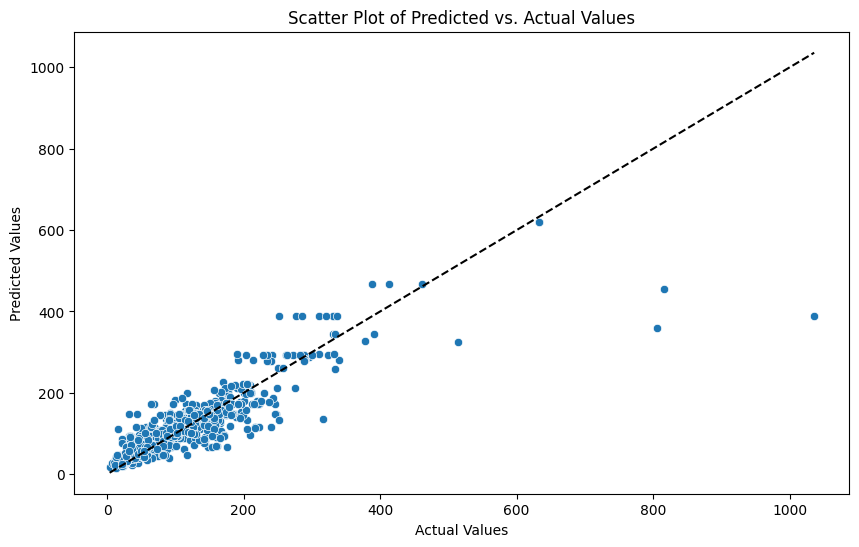

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_results_train['Actual'], y=df_results_train['Predicted'])
plt.plot([df_results_train['Actual'].min(), df_results_train['Actual'].max()], 
         [df_results_train['Actual'].min(), df_results_train['Actual'].max()], 'k--')  # Line representing perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.show()

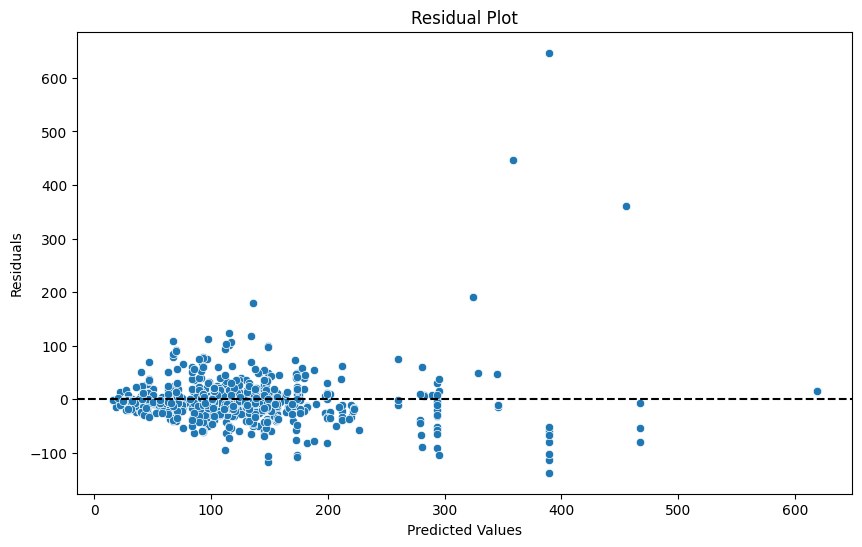

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_results_train['Predicted'], y=df_results_train['Error'])
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()